In [1]:
from wordcloud import STOPWORDS, WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
#https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
movie_dataset = pd.read_csv("IMDB Dataset.csv")
movie_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
movie_dataset["sentiment"].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
only_reviews = " ".join(movie_dataset.review)

In [6]:
len(only_reviews)

65521550

In [7]:
len(STOPWORDS)

192

In [8]:
print(STOPWORDS)

{"doesn't", 'however', "there's", "hasn't", 'your', 'on', 'his', 'could', 'is', 'am', 'have', 'most', 'both', 'into', "we'll", 'under', 'up', 'get', "he'll", 'itself', 'whom', 'because', "can't", 'these', 'above', 'by', 'between', 'when', 'should', 'therefore', 'herself', 'there', "here's", "haven't", 'those', 'through', 'what', "they'd", "i'm", 'own', 'while', "you've", "we've", "he's", 'all', 'like', 'they', 'hence', 'to', "we'd", 'themselves', 'ought', 'doing', "what's", 'was', 'further', "you'd", 'over', 'me', 'before', 'does', "shouldn't", 'their', 'during', 'any', 'from', "that's", "i've", "we're", 'k', 'www', 'such', "you're", 'only', "didn't", 'few', 'not', 'be', 'here', 'it', 'more', 'until', 'and', "she'd", 'too', "when's", 'at', 'the', 'can', "isn't", 'but', 'himself', 'were', "how's", 'hers', 'had', "aren't", 'com', 'else', 'with', 'very', "who's", 'other', "why's", 'just', 'of', 'same', 'where', 'do', "you'll", 'cannot', 'otherwise', 'yourself', 'yourselves', "let's", 'aga

In [9]:
type(STOPWORDS)

set

In [10]:
stop = ("movie","film")
STOPWORDS.update(stop) #update adding multiple items to a set 

In [11]:
len(STOPWORDS)

194

In [12]:
print(STOPWORDS)

{"doesn't", 'however', "there's", 'movie', "hasn't", 'your', 'on', 'his', 'could', 'is', 'am', 'have', 'most', 'both', 'into', "we'll", 'under', 'up', 'get', "he'll", 'itself', 'whom', 'because', "can't", 'these', 'above', 'by', 'between', 'when', 'should', 'therefore', 'herself', 'there', "here's", "haven't", 'those', 'through', 'what', "they'd", "i'm", 'own', 'while', "you've", "we've", "he's", 'all', 'like', 'they', 'hence', 'to', "we'd", 'themselves', 'ought', 'doing', "what's", 'was', 'further', "you'd", 'over', 'me', 'film', 'before', 'does', "shouldn't", 'their', 'during', 'any', 'from', "that's", "i've", "we're", 'k', 'www', 'such', "you're", 'only', "didn't", 'few', 'not', 'be', 'here', 'it', 'more', 'until', 'and', "she'd", 'too', "when's", 'at', 'the', 'can', "isn't", 'but', 'himself', 'were', "how's", 'hers', 'had', "aren't", 'com', 'else', 'with', 'very', "who's", 'other', "why's", 'just', 'of', 'same', 'where', 'do', "you'll", 'cannot', 'otherwise', 'yourself', 'yourselve

In [13]:
wc = WordCloud(width=1200,height=800,max_words=200,background_color="white",stopwords=STOPWORDS)

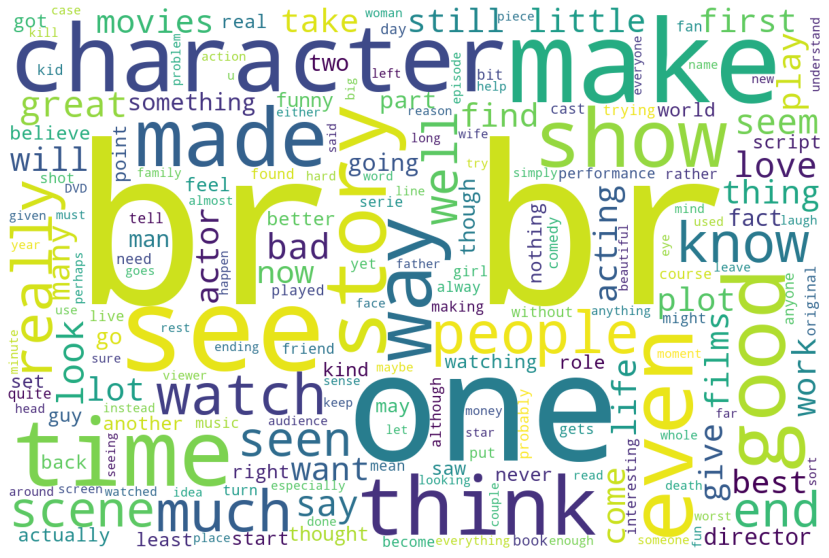

In [14]:
plt.figure(figsize=(16,10))
plt.imshow(wc.generate_from_text(only_reviews))
plt.axis("off")
plt.show()

In [15]:
tf = CountVectorizer(token_pattern="[a-z']+",max_df=0.6,min_df=10,stop_words=STOPWORDS,ngram_range=(2,2))

In [16]:
tf_mat = tf.fit_transform(movie_dataset.review)

In [17]:
tf_mat

<50000x49888 sparse matrix of type '<class 'numpy.int64'>'
	with 1404740 stored elements in Compressed Sparse Row format>

In [18]:
tf.vocabulary_

{'one reviewers': 30318,
 'exactly happened': 13442,
 'happened br': 19071,
 'br br': 5153,
 'br first': 5463,
 'first thing': 15557,
 'thing struck': 42735,
 'scenes violence': 36820,
 'set right': 38393,
 'right word': 35446,
 'word go': 48886,
 'faint hearted': 13944,
 'pulls punches': 33538,
 'drugs sex': 11290,
 'sex violence': 38525,
 'use word': 45859,
 'word br': 48882,
 'br called': 5178,
 'maximum security': 26090,
 'focuses mainly': 15726,
 'home many': 19798,
 'never far': 28492,
 'far away': 14243,
 'away br': 2857,
 'br say': 6048,
 'due fact': 11309,
 'around first': 2471,
 'first episode': 15390,
 'episode saw': 12518,
 'graphic violence': 18296,
 'violence violence': 46249,
 'away well': 2906,
 'well mannered': 47692,
 'middle class': 26592,
 'due lack': 11311,
 'experience watching': 13653,
 'may become': 26101,
 'darker side': 9833,
 'wonderful little': 48828,
 'production br': 33423,
 'br filming': 5454,
 'old time': 29718,
 'sense realism': 38132,
 'piece br': 3203

In [19]:
len(tf.vocabulary_)

49888

In [20]:
word_freq = tf_mat.sum(axis=0)

In [21]:
word_freq

matrix([[ 84, 194,  13, ...,  11,  15,  16]], dtype=int64)

In [22]:
word_freq[0]

matrix([[ 84, 194,  13, ...,  11,  15,  16]], dtype=int64)

In [23]:
word_freq.shape

(1, 49888)

In [33]:
word_freq = np.array(tf_mat.sum(axis=0)).reshape(tf_mat.shape[1],) #np.array

In [34]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse

{30318: 'one reviewers',
 13442: 'exactly happened',
 19071: 'happened br',
 5153: 'br br',
 5463: 'br first',
 15557: 'first thing',
 42735: 'thing struck',
 36820: 'scenes violence',
 38393: 'set right',
 35446: 'right word',
 48886: 'word go',
 13944: 'faint hearted',
 33538: 'pulls punches',
 11290: 'drugs sex',
 38525: 'sex violence',
 45859: 'use word',
 48882: 'word br',
 5178: 'br called',
 26090: 'maximum security',
 15726: 'focuses mainly',
 19798: 'home many',
 28492: 'never far',
 14243: 'far away',
 2857: 'away br',
 6048: 'br say',
 11309: 'due fact',
 2471: 'around first',
 15390: 'first episode',
 12518: 'episode saw',
 18296: 'graphic violence',
 46249: 'violence violence',
 2906: 'away well',
 47692: 'well mannered',
 26592: 'middle class',
 11311: 'due lack',
 13653: 'experience watching',
 26101: 'may become',
 9833: 'darker side',
 48828: 'wonderful little',
 33423: 'production br',
 5454: 'br filming',
 29718: 'old time',
 38132: 'sense realism',
 32035: 'piece br

In [35]:
tf_vocab_reverse[5000]

'boy well'

In [63]:
word_freq_dict={}
for k,v in tf.vocabulary_.items():
    val = word_freq[v]
    word_freq_dict[k]=val

In [64]:
word_freq_dict

{'one reviewers': 16,
 'exactly happened': 19,
 'happened br': 68,
 'br br': 101231,
 'br first': 902,
 'first thing': 160,
 'thing struck': 11,
 'scenes violence': 25,
 'set right': 13,
 'right word': 13,
 'word go': 26,
 'faint hearted': 11,
 'pulls punches': 17,
 'drugs sex': 15,
 'sex violence': 90,
 'use word': 82,
 'word br': 30,
 'br called': 27,
 'maximum security': 13,
 'focuses mainly': 10,
 'home many': 10,
 'never far': 13,
 'far away': 224,
 'away br': 198,
 'br say': 375,
 'due fact': 114,
 'around first': 14,
 'first episode': 177,
 'episode saw': 14,
 'graphic violence': 58,
 'violence violence': 12,
 'away well': 11,
 'well mannered': 14,
 'middle class': 204,
 'due lack': 44,
 'experience watching': 29,
 'may become': 27,
 'darker side': 30,
 'wonderful little': 24,
 'production br': 82,
 'br filming': 17,
 'old time': 84,
 'sense realism': 28,
 'piece br': 37,
 'br actors': 204,
 'extremely well': 177,
 'well chosen': 41,
 'well worth': 507,
 'worth watching': 858,
 

In [38]:
word_freq_sorted_dict ={
    k:v for k,v in sorted(word_freq_dict.items(), key = lambda item : item[1], reverse = True)
}

In [41]:
word_freq_sorted_dict

{'br br': 101231,
 'special effects': 2236,
 'even though': 1999,
 'one best': 1908,
 'low budget': 1821,
 'br one': 1687,
 'year old': 1573,
 'waste time': 1511,
 'much better': 1496,
 'first time': 1418,
 'sci fi': 1380,
 'new york': 1276,
 'years ago': 1255,
 'real life': 1225,
 'high school': 1154,
 'pretty good': 1107,
 'pretty much': 1099,
 'br story': 1070,
 'main character': 1066,
 'one worst': 997,
 'one thing': 994,
 'want see': 988,
 'well done': 977,
 'long time': 926,
 'br first': 902,
 'really good': 888,
 'must see': 880,
 'years later': 865,
 'worth watching': 858,
 'never seen': 848,
 'time br': 846,
 'many people': 836,
 'really bad': 833,
 'every time': 792,
 'br plot': 776,
 'main characters': 773,
 'love story': 772,
 'br overall': 764,
 'bad acting': 751,
 'br really': 749,
 'camera work': 733,
 'black white': 732,
 'many times': 719,
 'br acting': 717,
 'story line': 709,
 'whole thing': 705,
 'one br': 677,
 'good job': 672,
 'movies seen': 661,
 'character deve

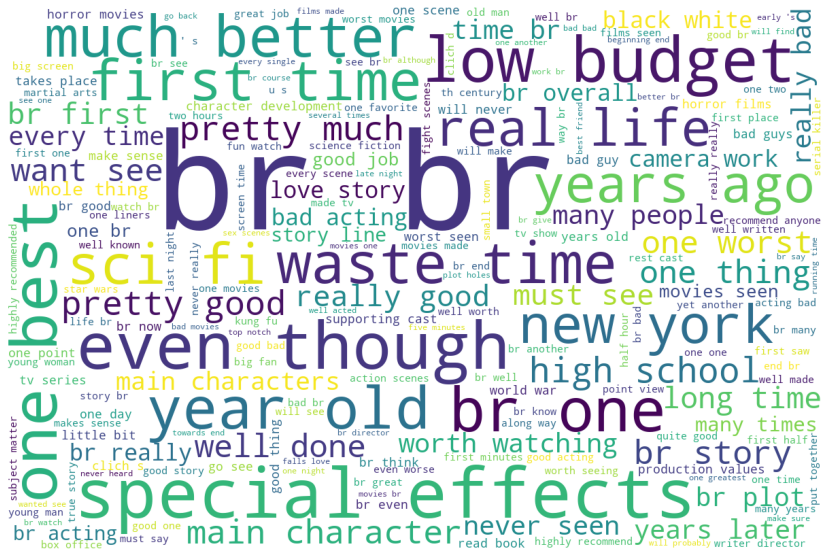

In [44]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_frequencies(word_freq_sorted_dict))
plt.axis("off")
plt.show()

In [45]:
tf1 = CountVectorizer(token_pattern="[a-z']+",min_df=12,max_df=0.6,ngram_range=(3,3))

In [46]:
tf_mat1 = tf1.fit_transform(movie_dataset.review)

In [47]:
tf_mat1

<50000x75372 sparse matrix of type '<class 'numpy.int64'>'
	with 3018770 stored elements in Compressed Sparse Row format>

In [48]:
tf1.vocabulary_

{'one of the': 46062,
 'of the other': 44299,
 'the other reviewers': 58928,
 'as this is': 8826,
 'this is exactly': 62934,
 'is exactly what': 32122,
 'exactly what happened': 18804,
 'what happened with': 71011,
 'with me br': 73160,
 'me br br': 38950,
 'br br the': 12112,
 'br the first': 12776,
 'the first thing': 57206,
 'first thing that': 20702,
 'that struck me': 54782,
 'scenes of violence': 50110,
 'right from the': 49441,
 'from the word': 22069,
 'the word go': 60890,
 'trust me this': 67509,
 'me this is': 39078,
 'this is not': 62962,
 'is not a': 32552,
 'a show for': 2015,
 'show for the': 51388,
 'for the faint': 21374,
 'pulls no punches': 48457,
 'with regards to': 73224,
 'in the classic': 30407,
 'use of the': 68243,
 'of the word': 44601,
 'word br br': 73673,
 'br br it': 11889,
 'br it is': 12496,
 'it is called': 34256,
 'as that is': 8668,
 'that is the': 54467,
 'given to the': 22661,
 'section of the': 50294,
 'of the prison': 44348,
 'where all the': 7160

In [49]:
len(tf1.vocabulary_)

75372

In [50]:
word_freq1 = tf_mat1.sum(axis=0)

In [51]:
word_freq1

matrix([[ 19,  14, 156, ...,  14,  19,  26]], dtype=int64)

In [52]:
word_freq1.shape

(1, 75372)

In [53]:
word_freq1 = np.array(word_freq1).reshape(75372,)

In [54]:
word_freq1

array([ 19,  14, 156, ...,  14,  19,  26], dtype=int64)

In [60]:
word_freq1[1]

14

In [56]:
tf1_vocab_reverse = {v:k for k,v in tf1.vocabulary_.items()}

In [57]:
tf1_vocab_reverse

{46062: 'one of the',
 44299: 'of the other',
 58928: 'the other reviewers',
 8826: 'as this is',
 62934: 'this is exactly',
 32122: 'is exactly what',
 18804: 'exactly what happened',
 71011: 'what happened with',
 73160: 'with me br',
 38950: 'me br br',
 12112: 'br br the',
 12776: 'br the first',
 57206: 'the first thing',
 20702: 'first thing that',
 54782: 'that struck me',
 50110: 'scenes of violence',
 49441: 'right from the',
 22069: 'from the word',
 60890: 'the word go',
 67509: 'trust me this',
 39078: 'me this is',
 62962: 'this is not',
 32552: 'is not a',
 2015: 'a show for',
 51388: 'show for the',
 21374: 'for the faint',
 48457: 'pulls no punches',
 73224: 'with regards to',
 30407: 'in the classic',
 68243: 'use of the',
 44601: 'of the word',
 73673: 'word br br',
 11889: 'br br it',
 12496: 'br it is',
 34256: 'it is called',
 8668: 'as that is',
 54467: 'that is the',
 22661: 'given to the',
 50294: 'section of the',
 44348: 'of the prison',
 71602: 'where all the

In [61]:
word_freq_dict1={}
for k,v in tf1.vocabulary_.items():
    val = word_freq1[v]
    word_freq_dict1[k]=val

In [62]:
word_freq_dict1

{'one of the': 9820,
 'of the other': 588,
 'the other reviewers': 61,
 'as this is': 89,
 'this is exactly': 50,
 'is exactly what': 89,
 'exactly what happened': 12,
 'what happened with': 19,
 'with me br': 21,
 'me br br': 519,
 'br br the': 15480,
 'br the first': 230,
 'the first thing': 138,
 'first thing that': 44,
 'that struck me': 20,
 'scenes of violence': 22,
 'right from the': 138,
 'from the word': 19,
 'the word go': 19,
 'trust me this': 15,
 'me this is': 95,
 'this is not': 1254,
 'is not a': 1165,
 'a show for': 17,
 'show for the': 24,
 'for the faint': 31,
 'pulls no punches': 16,
 'with regards to': 28,
 'in the classic': 37,
 'use of the': 195,
 'of the word': 129,
 'word br br': 18,
 'br br it': 1989,
 'br it is': 597,
 'it is called': 23,
 'as that is': 15,
 'that is the': 428,
 'given to the': 54,
 'section of the': 64,
 'of the prison': 18,
 'where all the': 61,
 'high on the': 26,
 'and more so': 13,
 'away br br': 158,
 'br br i': 7665,
 'br i would': 277,

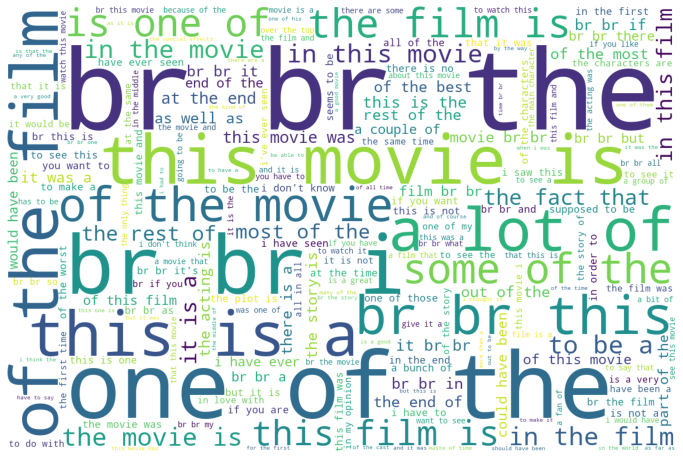

In [66]:
plt.figure(figsize=(12,10))
plt.imshow(wc.generate_from_frequencies(word_freq_dict1))
plt.axis("off")
plt.show()